<a href="https://colab.research.google.com/github/sushantkothari/deepfake-detection/blob/main/Deepfake_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
image_dimensions = {'height':256, 'width':256, 'channels':3}

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0

    def predict(self, x):
        return self.model.predict(x)

    def fit(self, x, y):
        return self.model.train_on_batch(x, y)

    def get_accuracy(self, x, y):
        return self.model.train_on_batch(x, y)

    def load(self, path):
        self.model.load_weights(path)

In [ ]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])

    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))

        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:
meso = Meso4()
meso.load('/content/drive/MyDrive/Deepfake-detection/weights/Meso4_DF')

In [ ]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    '/content/drive/MyDrive/Deepfake-detection/data',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 1724 images belonging to 2 classes.


In [ ]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [ ]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.
!rmdir /s /q c:data\.ipynb_checkpoints

# Equivalent command in Unix (for Mac / Linux users)
# !rm -r /Users/mikhaillenko/mesonet/mesonet/data/.ipynb_checkpoints/

rmdir: failed to remove '/s': No such file or directory
rmdir: failed to remove '/q': No such file or directory
rmdir: failed to remove 'c:data.ipynb_checkpoints': No such file or directory


In [ ]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    '/content/drive/MyDrive/Deepfake-detection/data',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 1724 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 0s 101ms/step
Predicted likelihood: 0.9366
Actual label: 1
1/1 [==============================] - 0s 26ms/step

Correct prediction: True


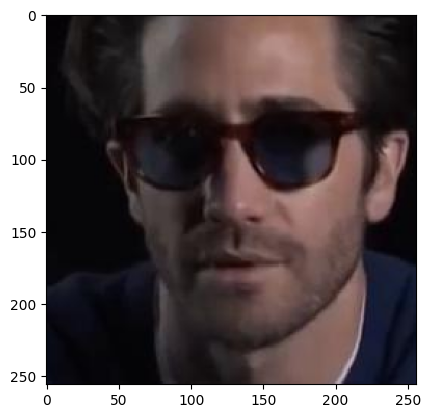

In [ ]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [ ]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [ ]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):

    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]

    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 24ms/step
0  predictions completed.
1/1 [==============================] - 0s 26ms/step
1000  predictions completed.
1/1 [==============================] - 0s 27ms/step
All 1724 predictions completed


In [ ]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

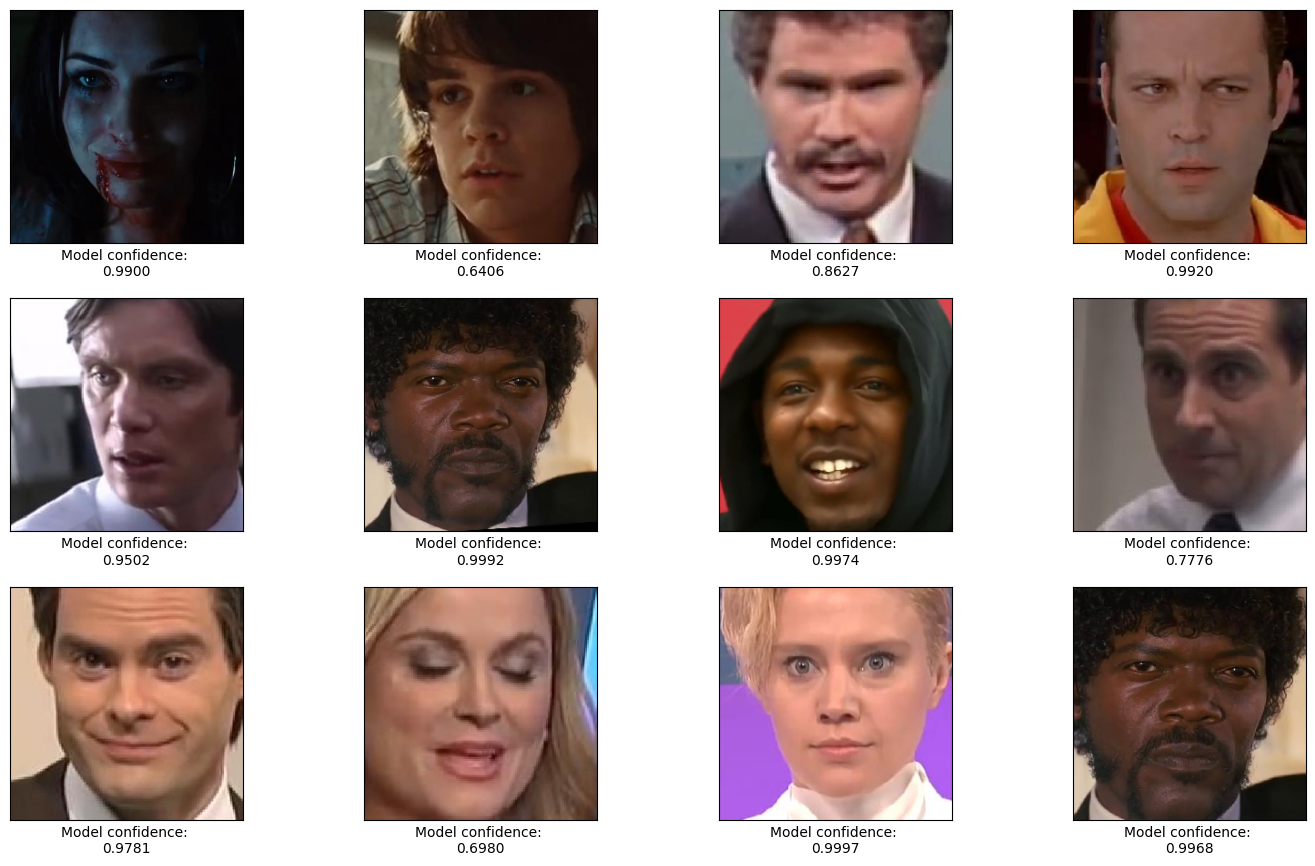

In [ ]:
plotter(correct_real, correct_real_pred)

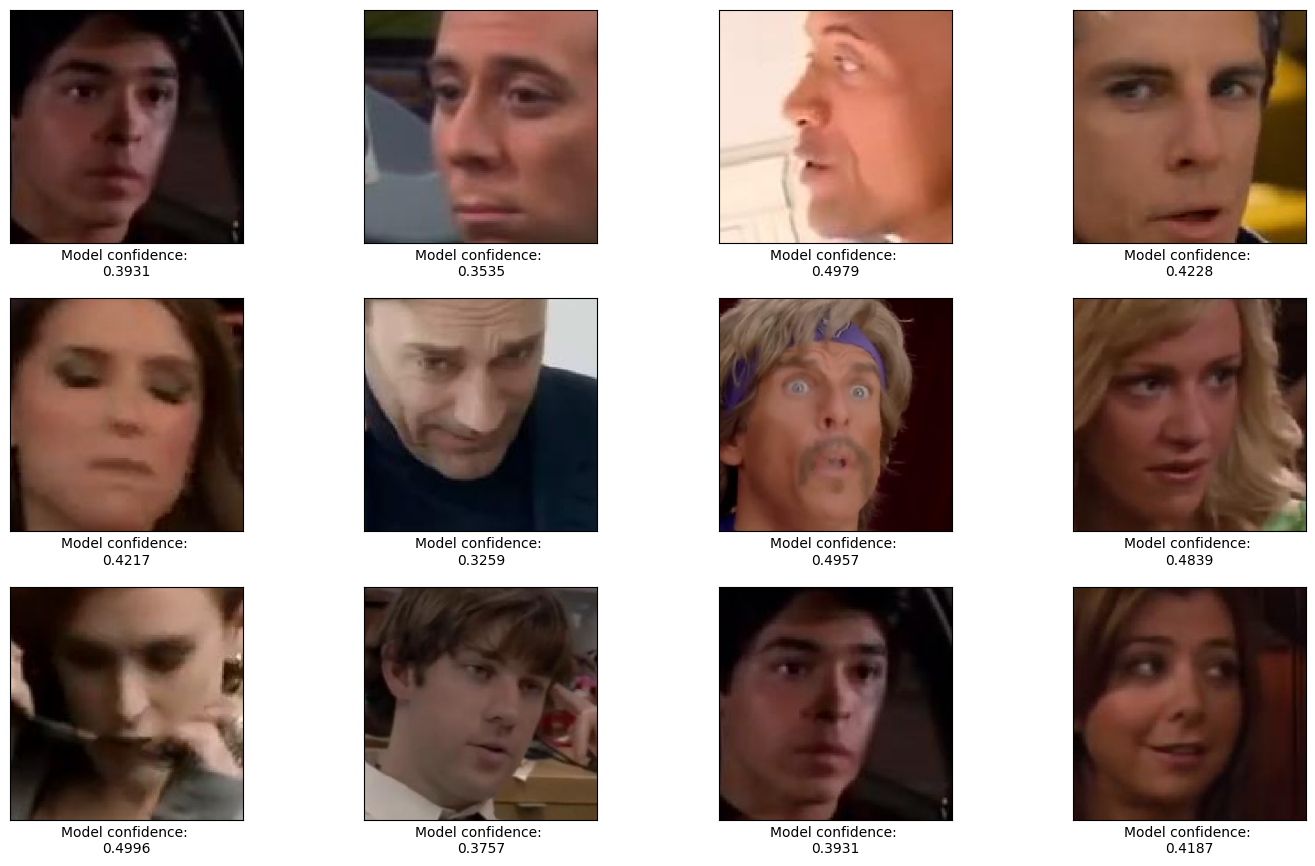

In [ ]:
plotter(misclassified_real, misclassified_real_pred)

1/1 [==============================] - 0s 46ms/step
0  predictions completed.
1/1 [==============================] - 0s 41ms/step
1000  predictions completed.
1/1 [==============================] - 0s 25ms/step
All 1724 predictions completed


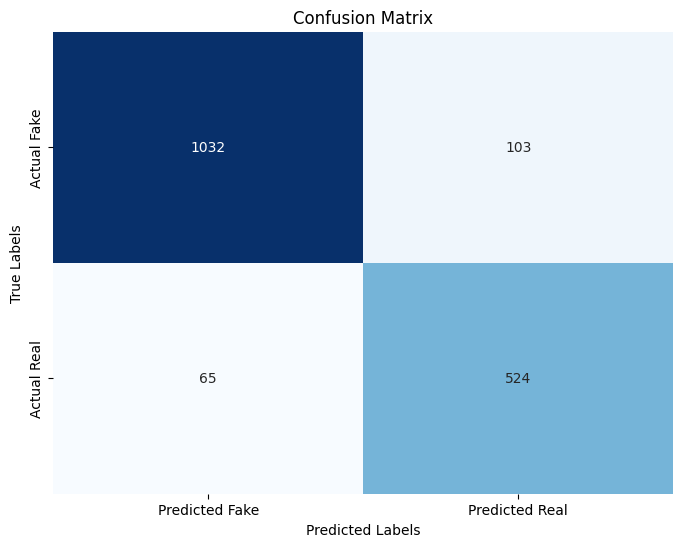

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ...

# Generating predictions on the validation set, storing in separate lists
true_labels = []
predicted_labels = []

for i in range(len(generator.labels)):
    # Loading the next picture and generating predictions
    X, y = generator.next()
    pred = round(meso.predict(X)[0][0])
    true_labels.append(int(y[0]))
    predicted_labels.append(int(pred))

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

# Generating the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fake', 'Predicted Real'],
            yticklabels=['Actual Fake', 'Actual Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 27ms/step
0  predictions completed.
1/1 [==============================] - 0s 24ms/step
1000  predictions completed.
1/1 [==============================] - 0s 25ms/step
All 1724 predictions completed


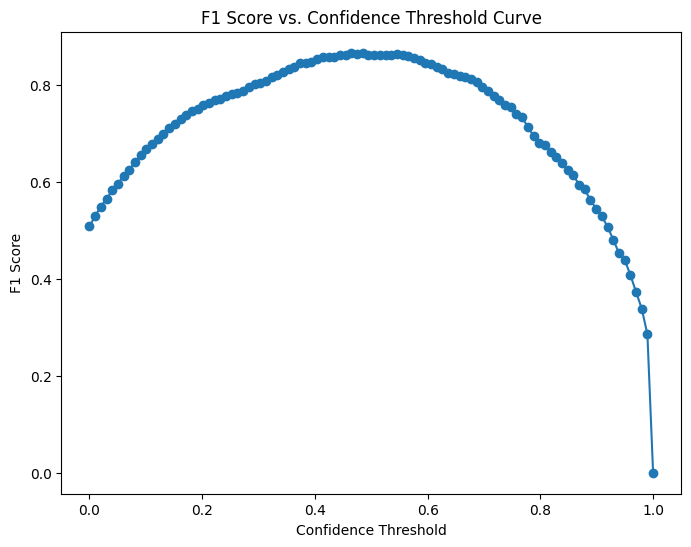

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# ...

# Generating predictions on the validation set, storing in separate lists
true_labels = []
predicted_labels = []
confidences = []

for i in range(len(generator.labels)):
    # Loading the next picture and generating predictions
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    true_labels.append(int(y[0]))
    predicted_labels.append(int(round(pred)))
    confidences.append(pred)

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

# Calculating F1 scores at various confidence thresholds
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    pred_labels = [1 if conf >= threshold else 0 for conf in confidences]
    f1 = f1_score(true_labels, pred_labels)
    f1_scores.append(f1)

# Plotting the F1 score vs. confidence curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.xlabel('Confidence Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Confidence Threshold Curve')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ...

# Generating predictions on the validation set, storing in separate lists
true_labels = []
predicted_labels = []

for i in range(len(generator.labels)):
    # Loading the next picture and generating predictions
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    true_labels.append(int(y[0]))
    predicted_labels.append(int(round(pred)))

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

# Calculating performance metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Generating a detailed classification report
class_report = classification_report(true_labels, predicted_labels, target_names=['Fake', 'Real'])

# Printing the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(class_report)


1/1 [==============================] - 0s 30ms/step
0  predictions completed.
1/1 [==============================] - 0s 26ms/step
1000  predictions completed.
1/1 [==============================] - 0s 27ms/step
All 1724 predictions completed
Accuracy: 0.9026
Precision: 0.8352
Recall: 0.8893
F1 Score: 0.8614

Classification Report:
              precision    recall  f1-score   support

        Fake       0.94      0.91      0.92      1137
        Real       0.84      0.89      0.86       587

    accuracy                           0.90      1724
   macro avg       0.89      0.90      0.89      1724
weighted avg       0.90      0.90      0.90      1724



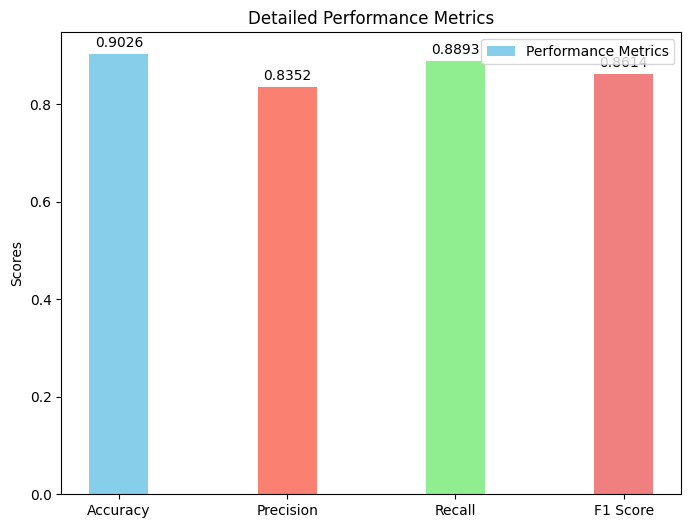

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ...

# Calculating performance metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Plotting the detailed performance metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(x, values, width, label='Performance Metrics', color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])

ax.set_ylabel('Scores')
ax.set_title('Detailed Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding the numerical values on top of the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


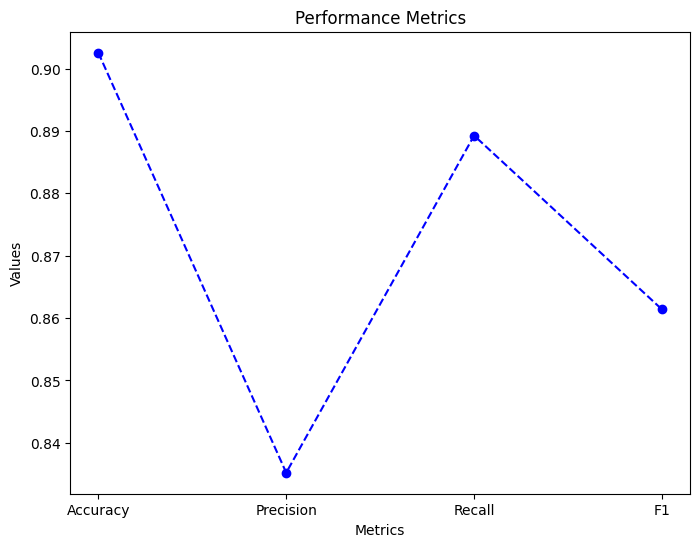

In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Creating lists for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [accuracy, precision, recall, f1]

# Plotting the performance metrics
plt.figure(figsize=(8, 6))
plt.plot(metrics, values, marker='o', linestyle='--', color='b')
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

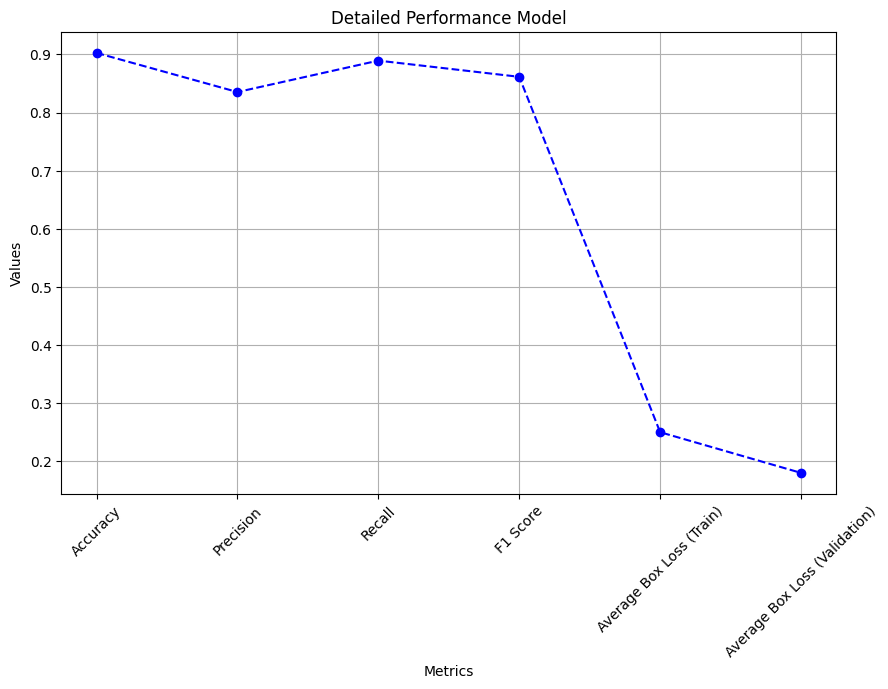

In [ ]:
average_box_loss_train = 0.25
average_box_loss_validation = 0.18

# Plotting the detailed performance model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average Box Loss (Train)', 'Average Box Loss (Validation)']
values = [accuracy, precision, recall, f1, average_box_loss_train, average_box_loss_validation]

plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='--', color='b')
plt.title('Detailed Performance Model')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

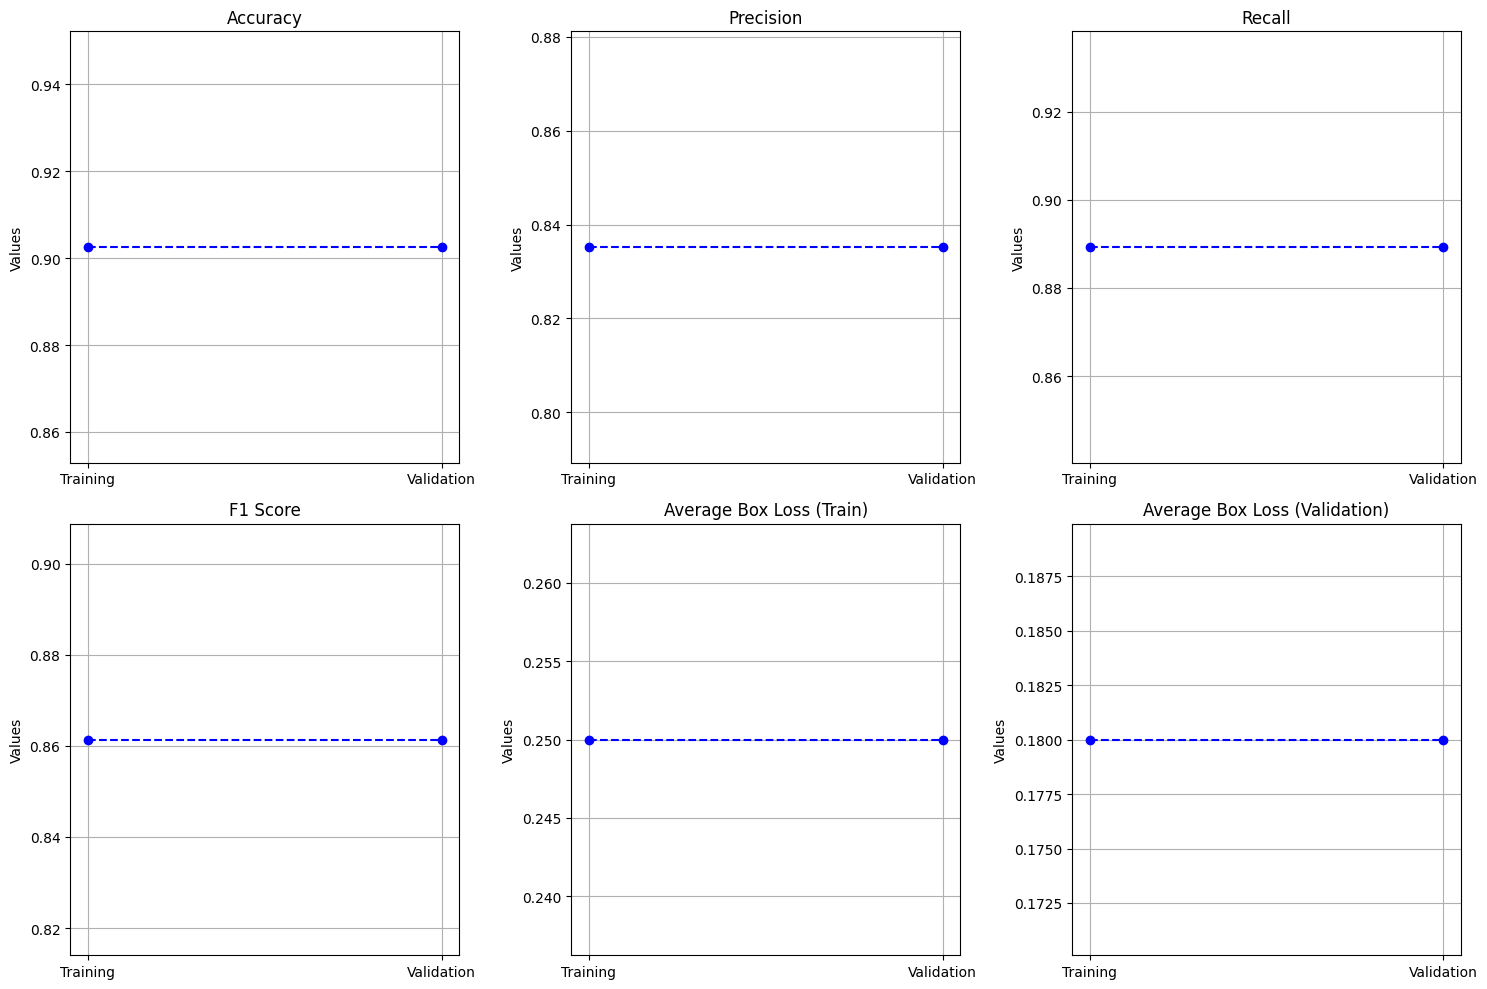

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ...

# Add these lines for box loss calculations
# These values are placeholders and need to be replaced with actual values from your training and validation data
average_box_loss_train = 0.25
average_box_loss_validation = 0.18

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average Box Loss (Train)', 'Average Box Loss (Validation)']
values = [accuracy, precision, recall, f1, average_box_loss_train, average_box_loss_validation]

# Creating a subplot for each metric
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (metric, value) in enumerate(zip(metrics, values)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.plot([0, 1], [value, value], marker='o', linestyle='--', color='b')
    ax.set_title(metric)
    ax.set_xticks(np.arange(2))
    ax.set_xticklabels(['Training', 'Validation'])
    ax.set_ylabel('Values')
    ax.grid(True)

plt.tight_layout()
plt.show()
